In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
metadata=pd.read_csv('data/movies_data.csv')

# 数据预览

In [87]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [88]:
metadata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [89]:
metadata.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


# 数据分析

### 数据相关性

<AxesSubplot:>

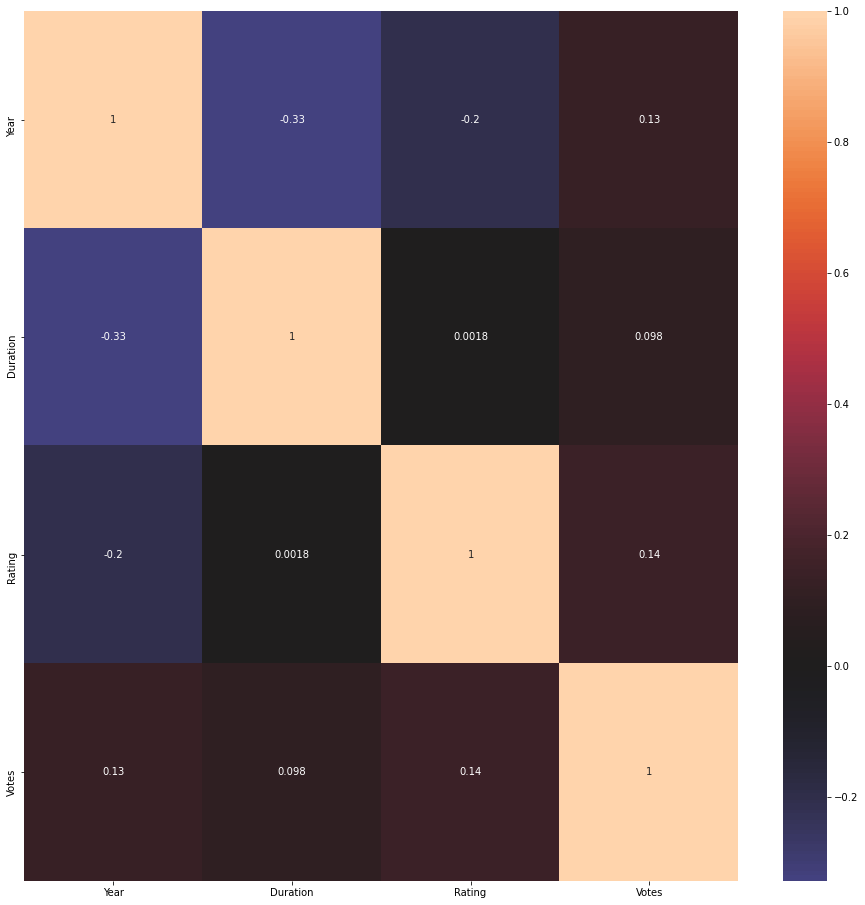

In [90]:
corrs = metadata.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs,
             annot=True, # 注入数据
            center = 0)  # 绘制有色数据时将色彩映射居中的值)

### top movie

In [91]:
year_data=metadata.groupby(by='Year')
# .sort_values(by='Rating',ascending=False)

In [92]:
year_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
4867,Street Singer,1938,135,Drama,6.3,15,Phani Majumdar,K.L. Saigal,Kanan Devi,Boken Chatto
5020,Teen Sau Din Ke Baad,1938,158,Adventure,6.4,10,Sarvottam Badami,Sabita Devi,Motilal,Bibbo
5095,The Court Dancer: Raj Narkati,1941,144,Drama,6.4,19,Modhu Bose,Sadhona Bose,Protima Dasgupta,Binita Gupta
5144,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo


In [93]:
for gp, data in year_data:
    print('组别：',gp)
    print('数据：',data)

组别： 1931
数据：                         Name  Year  Duration           Genre  Rating  Votes  \
1567                Draupadi  1931       124           Drama     5.3      6   
5144  The Light of the World  1931       124  Drama, Fantasy     6.2    112   

                    Director        Actor 1   Actor 2 Actor 3  
1567  Bhagwati Prasad Mishra         Khalil  Ermeline   Jillo  
5144          Ardeshir Irani  Master Vithal   Zubeida   Jillo  
组别： 1932
数据：             Name  Year  Duration             Genre  Rating  Votes    Director  \
2293  Indrasabha  1932       211  Musical, Romance     6.0     12  J.J. Madan   

     Actor 1          Actor 2              Actor 3  
2293  Nissar  Jehanara Kajjan  Abdul Rehman Kabuli  
组别： 1933
数据：       Name  Year  Duration           Genre  Rating  Votes   Director  \
1736  Fate  1933        68  Drama, Romance     6.2     12  John Hunt   

          Actor 1       Actor 2         Actor 3  
1736  Devika Rani  Himanshu Rai  Abraham Sofaer  
组别： 1934
数据：     